In [1]:
%matplotlib inline

# import statements
import numpy as np
import matplotlib.pyplot as plt #for figures
import pandas as pd


## A simple test to see how to extract the correct data sets. 

We need one additional thing: ask Lena about the time evolutions for more of the runs (for these, I don't think I have the Q_cmb evolution...)

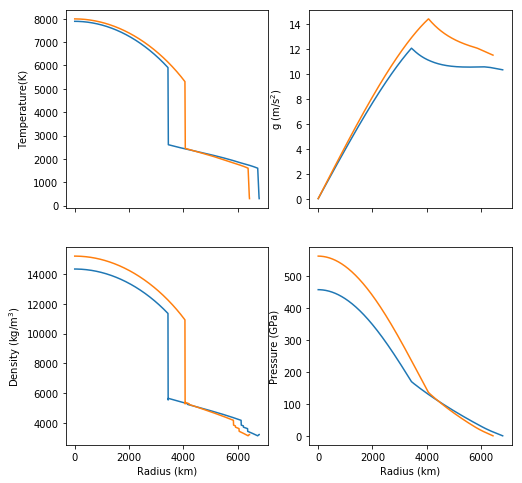

In [6]:
files = ['data_prof_M_ 1.2_Fe_30.0000_FeM_ 0.0000.res',
         'data_prof_M_ 1.2_Fe_50.0000_FeM_ 0.0000.res']

names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "oups", "Cp(J/kgK)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]

fig, ax3 = plt.subplots(2,2, figsize=[8,8], sharex=True)


def figure(data, i, symb="-"): 
    ax3[0,0].plot(data["r(m)"]/1e3, data["T(K)"], symb)
    ax3[0,1].plot(data["r(m)"]/1e3, data["g(m/s^2)"], symb)
    ax3[1,0].plot(data["r(m)"]/1e3, data["rho(kg/m^3)"], symb)
    ax3[1,1].plot(data["r(m)"]/1e3, data["p(GPa)"], symb)
    ax3[0,0].set_ylabel("Temperature(K)")
    ax3[0,1].set_ylabel("g (m/s$^2$)")
    ax3[1,0].set_ylabel("Density (kg/m$^3$)")
    ax3[1,1].set_ylabel("Pressure (GPa)")
    ax3[1,0].set_xlabel("Radius (km)")
    ax3[1,1].set_xlabel("Radius (km)")
    
for i, (filename) in enumerate((files)):
    data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    figure(data, i)

## Focus on the core values only

[1.43254913e+04 7.85503120e+06 4.38821508e-01]
457.0129233
1770.0242456690437
[1.51882396e+04 8.12865084e+06 4.85704110e-01]
561.927049
2130.669826279427


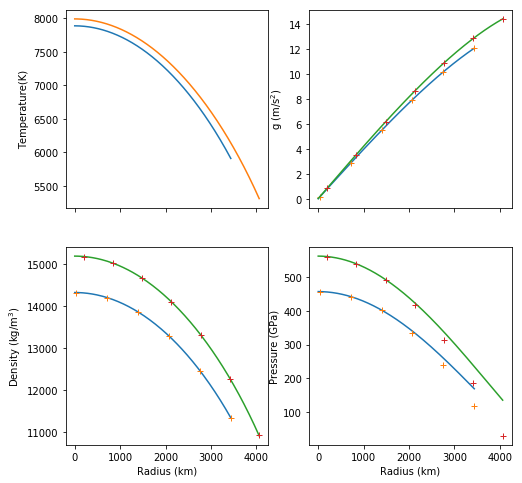

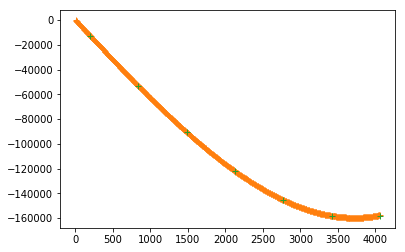

In [44]:
files = ['data_prof_M_ 1.2_Fe_30.0000_FeM_ 0.0000.res',
         'data_prof_M_ 1.2_Fe_50.0000_FeM_ 0.0000.res']

fig, ax3 = plt.subplots(2,2, figsize=[8,8], sharex=True)

def theoritical_density(r, *args):
    """ Equation (5) in Labrosse 2015 """
    rho_0, L_rho, A_rho = args
    return rho_0*(1-r**2/L_rho**2-A_rho*r**4/L_rho**4)

def gravity(r, *args):
    G = 6.67430e-11
    rho_0, L_rho, A_rho = args
    parenthesis = 1-3/5*r**2/L_rho**2-3/7*A_rho*r**4/L_rho**4
    return 4.*np.pi/3.*G*rho_0*r*parenthesis

def pressure_diff(r, *args):  #in GPa
    rho_0, L_rho, A_rho = args
    G = 6.67430e-11
    K0 = L_rho**2/3.*2.*np.pi*G*rho_0**2 /1e9 #in GPa
    print(K0)
    parenthesis = r**2/L_rho**2-4./5.*r**4/L_rho**4
    return -K0*parenthesis

from scipy.optimize import curve_fit

initial_guess = 12500, 8000e3, 0.484 # initial guess, obtained from Earth values. 

for i, (filename) in enumerate((files)):
    profiles = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    core = profiles[profiles["Material-Parameter"]==8.]
    rho = core["rho(kg/m^3)"]
    radius = core["r(m)"]
    figure(core, i)
    
    popt, pcov = curve_fit(theoritical_density, radius, rho, initial_guess)
    print(popt)
    
    ax3[1,0].plot(radius[::100]/1e3, theoritical_density(radius[::100], *popt), '+')
    ax3[0,1].plot(radius[::100]/1e3, gravity(radius[::100], *popt), '+')
    P0 = core["p(GPa)"].iloc[-1]
    print(P0)
    ax3[1,1].plot(radius[::100]/1e3, pressure_diff(radius[::100], *popt)+P0, '+')
    
    
fig, ax =plt.subplots()

dPdr = (core["p(GPa)"].diff())/core["r(m)"].diff()*1e9


ax.plot(radius/1e3, dPdr)
ax.plot(radius/1e3, -core["rho(kg/m^3)"]*core["g(m/s^2)"], '+')
ax.plot(radius[::100]/1e3, -theoritical_density(radius[::100], *popt)*gravity(radius[::100], *popt), '+')

In [43]:
print(core)

      g(m/s^2)      p(GPa)   rho(kg/m^3)          r(m)         T(K)  \
369  14.435245  135.820358  10919.533088  4.060163e+06  5308.915306   
370  14.422036  136.836133  10935.191218  4.053724e+06  5318.719775   
371  14.408773  137.852435  10950.870432  4.047284e+06  5328.494618   
372  14.395456  138.869252  10966.472542  4.040844e+06  5338.239959   
373  14.382085  139.886573  10981.997088  4.034405e+06  5347.956028   
374  14.368661  140.904385  10997.492878  4.027965e+06  5357.642999   
375  14.355184  141.922680  11012.959692  4.021526e+06  5367.300993   
376  14.341655  142.941446  11028.347882  4.015086e+06  5376.930183   
377  14.328072  143.960672  11043.706503  4.008646e+06  5386.530742   
378  14.314437  144.980348  11059.035336  4.002207e+06  5396.102788   
379  14.300749  146.000462  11074.284497  3.995767e+06  5405.646493   
380  14.287009  147.021005  11089.503283  3.989328e+06  5415.162026   
381  14.273217  148.041965  11104.691480  3.982888e+06  5424.649504   
382  1